In [1]:
import os, sys
parent_dir = os.path.realpath('..')
sys.path.append(parent_dir)  # parent directory path adding

In [2]:
import pandas as pd
import numpy as np
import logging
import json

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

from src.libs.dataset_utils import SinDataset
from src.data.trigonometric_dataset import *
from src.models.sin_LSTM import SinLSTM
from src.libs.train_valid_test_utils import TrainValidEvaluate
from src.libs.visualize_utils import VisualizeUtils

In [3]:
import sys

print(sys.executable)

/Users/a10961/Library/Caches/pypoetry/virtualenvs/accidentdetection-lv2-8hKmzXpf-py3.10/bin/python


In [4]:
device = 'cpu'
model_name = 'sin2cos_lstm'
hidden_dim1 = 100
batch_size = 16
num_layers = 2
sin_data_number = 1000
sin_data_interval = 20
data_sequence_length = 10
device = 'cpu'

# Generate Data

In [5]:
save_name = f"{model_name}_hd1_{hidden_dim1}_nl_{num_layers}_lr_{learning_rate}"
save_dir = f"{parent_dir}/models/{model_name}"
save_path = f"{save_dir}/{save_name}.pth"

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [6]:
total_data = generate_cos_to_sin_data(
    d_num=sin_data_number,
    data_interval=sin_data_interval,
    data_sequence=data_sequence_length
)

In [7]:
train_dataset = SinDataset(total_data=total_data, data_type='train')
valid_dataset = SinDataset(total_data=total_data, data_type='valid')
test_dataset = SinDataset(total_data=total_data, data_type='test')

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

# Modeling

In [8]:
lstm_input_dim = len(train_dataset[0][1][-1])

In [9]:
model = SinLSTM(input_dim=lstm_input_dim, lstm_hidden_dim=hidden_dim1, num_layers=num_layers).to(device)

# Training

In [18]:
weight_decay = 1e-6
learning_rate = 1e-4
n_epochs = 200

In [19]:
optimizer = torch.optim.Adam(model.parameters(),
                             lr=learning_rate,
                             weight_decay=weight_decay)

In [20]:
criterion = nn.MSELoss()

In [21]:
train_valid_evaluate = TrainValidEvaluate(
    model=model,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    n_epochs=n_epochs,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    path=save_path,
    logging=logging,
)

In [22]:
train_valid_evaluate.sin_train()

50it [00:00, 120.69it/s]
50it [00:00, 118.99it/s]
50it [00:00, 122.55it/s]
50it [00:00, 88.50it/s]
50it [00:00, 125.30it/s]
50it [00:00, 111.36it/s]
50it [00:00, 110.57it/s]
50it [00:00, 114.61it/s]
50it [00:00, 110.36it/s]
50it [00:00, 90.04it/s]
50it [00:00, 112.34it/s]
50it [00:00, 107.13it/s]
50it [00:00, 108.39it/s]
50it [00:00, 107.94it/s]
50it [00:00, 109.30it/s]
50it [00:00, 118.96it/s]
50it [00:00, 103.24it/s]
50it [00:00, 112.58it/s]
50it [00:00, 114.51it/s]
50it [00:00, 107.08it/s]
50it [00:00, 111.95it/s]
50it [00:00, 112.91it/s]
50it [00:00, 92.65it/s]
50it [00:00, 93.93it/s]
50it [00:00, 99.80it/s] 
50it [00:00, 67.71it/s]
50it [00:00, 68.84it/s]
50it [00:00, 69.43it/s]
50it [00:00, 100.65it/s]
50it [00:00, 51.28it/s]
50it [00:00, 65.11it/s]
50it [00:00, 69.27it/s] 
50it [00:00, 83.67it/s]
50it [00:00, 104.23it/s]
50it [00:00, 103.79it/s]
50it [00:00, 86.95it/s]
50it [00:00, 83.95it/s]
50it [00:00, 103.53it/s]
50it [00:00, 88.95it/s] 
50it [00:00, 95.47it/s]
50it [00:00, 

In [14]:
loss, mape, pred, targ = train_valid_evaluate.sin_test()

In [15]:
print(f'TEST SCORE :: \n \ttest MAPE={train_valid_evaluate.avg_test_mape:.4f} \n\ttest loss={train_valid_evaluate.avg_test_loss:.4f}')

TEST SCORE :: 
 	test MAPE=0.0942 
	test loss=0.0474


# Visualize

In [16]:
visualize_util = VisualizeUtils(predict_value=train_valid_evaluate.test_prediction_result,
                                true_value=train_valid_evaluate.test_target_result,
                                data_interval=sin_data_interval)

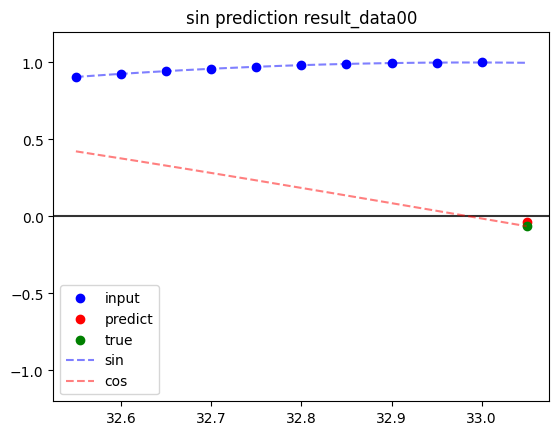

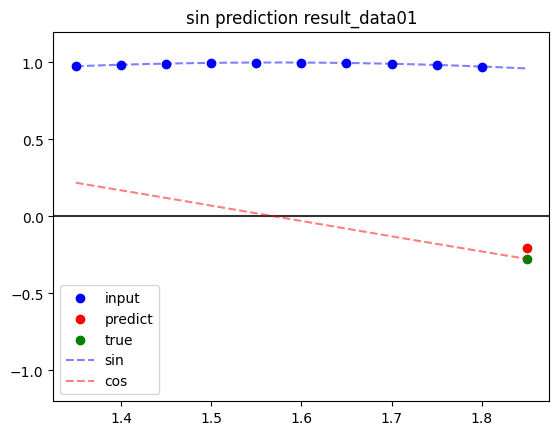

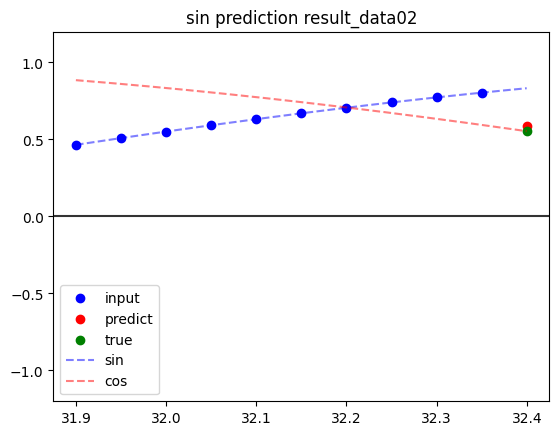

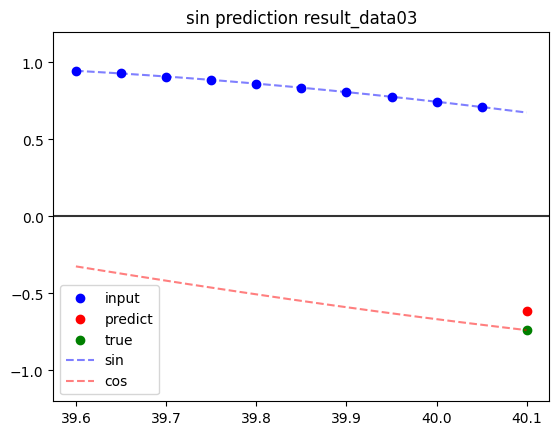

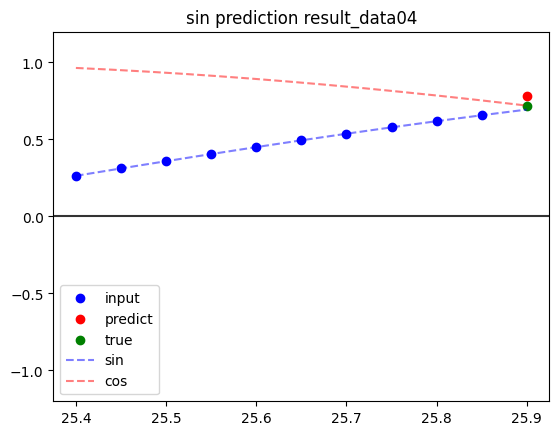

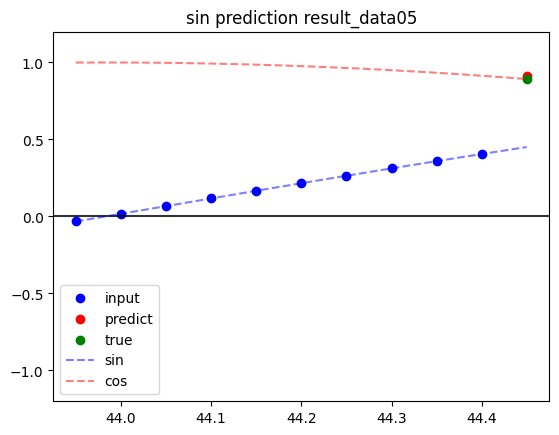

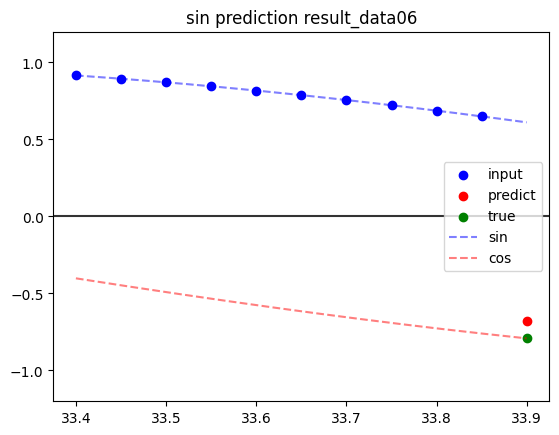

In [17]:
visualize_util.visualize_sin2cos_data('sin prediction result')